In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [3]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [4]:
filtered_sugar = final_df[final_df['Step'].str.strip() == 'Add Sugar']
filtered_sugar = filtered_sugar[filtered_sugar['Participant'] != 'C011']
filtered_sugar
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C002,28,Add Sugar,1219.616559,1523.925405,2250.325627,1662.424118,2844.636220,3298.153806,2615.483562,1900.866426
11,C004,30,Add Sugar,834.634076,1270.300473,1794.529046,1250.381908,2174.306553,1572.653802,1121.966885,875.340386
22,C005,46,Add Sugar,651.764749,992.870694,912.434261,895.313499,1986.045627,1096.984592,1797.140450,1300.105150
33,C010,54,Add Sugar,891.446470,1260.546475,1441.743448,1127.100325,1798.104683,3013.718244,2055.521326,1381.385164
46,C014,32,Add Sugar,524.253096,546.827888,981.901698,753.859723,1504.195730,1212.990609,892.038747,698.705910
57,C015,33,Add Sugar,393.568617,328.129303,493.936647,460.010155,548.517445,1022.619151,818.355667,613.929269
68,C018,50,Add Sugar,1287.271687,1688.517361,2135.886985,1743.068755,2505.423895,2433.836189,1523.827369,1330.136232
79,C019,40,Add Sugar,180.132028,428.556410,695.626225,351.368776,808.390077,131.023879,837.637312,547.770586
90,C022,32,Add Sugar,1309.780075,1482.960198,1250.464466,1256.406369,1446.831681,3457.792216,2469.648496,1874.958341
101,C023,52,Add Sugar,519.632316,525.054737,734.618234,692.618955,717.350571,1437.952602,1258.753167,912.422757


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_sugar = filtered_sugar.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_sugar.select_dtypes(include=['float64', 'int64']).columns
filtered_sugar[numerical_cols] = filtered_sugar[numerical_cols].replace(0, np.nan)

filtered_sugar[numerical_cols] = imputer.fit_transform(filtered_sugar[numerical_cols])
filtered_sugar

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C002,28.0,Add Sugar,1219.616559,1523.925405,2250.325627,1662.424118,2844.636220,3298.153806,2615.483562,1900.866426
11,C004,30.0,Add Sugar,834.634076,1270.300473,1794.529046,1250.381908,2174.306553,1572.653802,1121.966885,875.340386
22,C005,46.0,Add Sugar,651.764749,992.870694,912.434261,895.313499,1986.045627,1096.984592,1797.140450,1300.105150
33,C010,54.0,Add Sugar,891.446470,1260.546475,1441.743448,1127.100325,1798.104683,3013.718244,2055.521326,1381.385164
46,C014,32.0,Add Sugar,524.253096,546.827888,981.901698,753.859723,1504.195730,1212.990609,892.038747,698.705910
57,C015,33.0,Add Sugar,393.568617,328.129303,493.936647,460.010155,548.517445,1022.619151,818.355667,613.929269
68,C018,50.0,Add Sugar,1287.271687,1688.517361,2135.886985,1743.068755,2505.423895,2433.836189,1523.827369,1330.136232
79,C019,40.0,Add Sugar,180.132028,428.556410,695.626225,351.368776,808.390077,131.023879,837.637312,547.770586
90,C022,32.0,Add Sugar,1309.780075,1482.960198,1250.464466,1256.406369,1446.831681,3457.792216,2469.648496,1874.958341
101,C023,52.0,Add Sugar,519.632316,525.054737,734.618234,692.618955,717.350571,1437.952602,1258.753167,912.422757


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Sugar',
    'HeadCamera Distance': 'HeadCamera Distance - Add Sugar',
    'LeftElbow Distance': 'LeftElbow Distance - Add Sugar',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Sugar',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Sugar',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Sugar',
    'RightElbow Distance': 'RightElbow Distance - Add Sugar',
    'RightShoulder Distance': 'RightShoulder Distance - Add Sugar'
}

# Rename columns
filtered_sugar = filtered_sugar.rename(columns=new_column_names)
filtered_sugar

,Participant,Block Design Raw Score,Step,Chest Distance - Add Sugar,HeadCamera Distance - Add Sugar,LeftElbow Distance - Add Sugar,LeftShoulder Distance - Add Sugar,MotionControllerLeft Distance - Add Sugar,MotionControllerRight Distance - Add Sugar,RightElbow Distance - Add Sugar,RightShoulder Distance - Add Sugar
0,C002,28.0,Add Sugar,1219.616559,1523.925405,2250.325627,1662.424118,2844.636220,3298.153806,2615.483562,1900.866426
11,C004,30.0,Add Sugar,834.634076,1270.300473,1794.529046,1250.381908,2174.306553,1572.653802,1121.966885,875.340386
22,C005,46.0,Add Sugar,651.764749,992.870694,912.434261,895.313499,1986.045627,1096.984592,1797.140450,1300.105150
33,C010,54.0,Add Sugar,891.446470,1260.546475,1441.743448,1127.100325,1798.104683,3013.718244,2055.521326,1381.385164
46,C014,32.0,Add Sugar,524.253096,546.827888,981.901698,753.859723,1504.195730,1212.990609,892.038747,698.705910
57,C015,33.0,Add Sugar,393.568617,328.129303,493.936647,460.010155,548.517445,1022.619151,818.355667,613.929269
68,C018,50.0,Add Sugar,1287.271687,1688.517361,2135.886985,1743.068755,2505.423895,2433.836189,1523.827369,1330.136232
79,C019,40.0,Add Sugar,180.132028,428.556410,695.626225,351.368776,808.390077,131.023879,837.637312,547.770586
90,C022,32.0,Add Sugar,1309.780075,1482.960198,1250.464466,1256.406369,1446.831681,3457.792216,2469.648496,1874.958341
101,C023,52.0,Add Sugar,519.632316,525.054737,734.618234,692.618955,717.350571,1437.952602,1258.753167,912.422757


In [7]:
tracker_columns = ['Chest Distance - Add Sugar', 'HeadCamera Distance - Add Sugar', 'LeftElbow Distance - Add Sugar', 'LeftShoulder Distance - Add Sugar',
                   'RightElbow Distance - Add Sugar', 'RightShoulder Distance - Add Sugar', 'MotionControllerLeft Distance - Add Sugar',
                   'MotionControllerRight Distance - Add Sugar']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_sugar, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_sugar[block_design_col], filtered_sugar[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_sugar, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Sugar,-0.298013,0.300735
1,HeadCamera Distance - Add Sugar,-0.209252,0.472782
2,LeftElbow Distance - Add Sugar,-0.310573,0.279818
3,LeftShoulder Distance - Add Sugar,-0.297358,0.301851
4,RightElbow Distance - Add Sugar,-0.028634,0.922592
5,RightShoulder Distance - Add Sugar,-0.048458,0.869334
6,MotionControllerLeft Distance - Add Sugar,-0.259913,0.369507
7,MotionControllerRight Distance - Add Sugar,-0.189428,0.516593


In [8]:
#filtered_sugar.to_csv('SimplePie_AddSugar.csv',index=False)

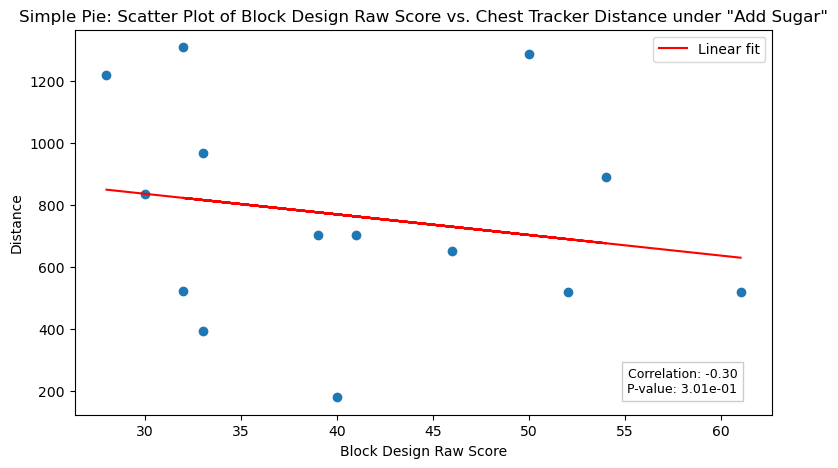

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = filtered_sugar
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Sugar'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '9 SP_SugarDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

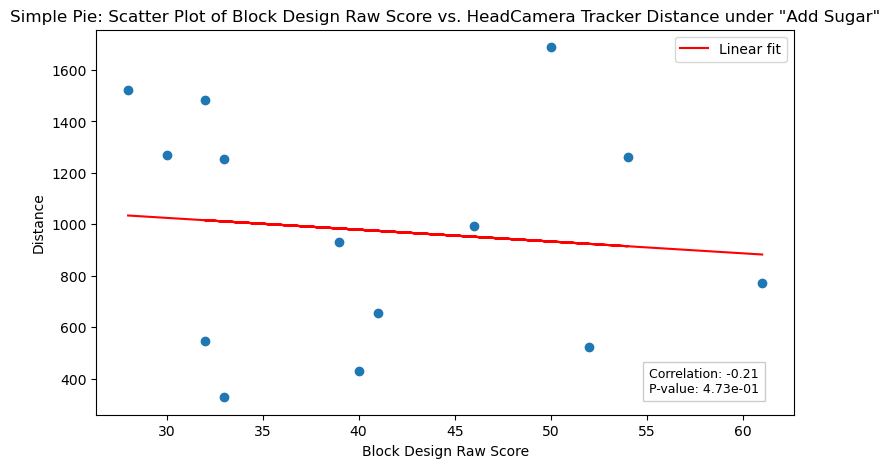

In [10]:
correlation, p_value = spearmanr(filtered_sugar['Block Design Raw Score'], filtered_sugar['HeadCamera Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_sugar['Block Design Raw Score'], filtered_sugar['HeadCamera Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_sugar['Block Design Raw Score'], filtered_sugar['HeadCamera Distance - Add Sugar'], 1)
fit_line = slope * filtered_sugar['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_sugar['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '10 SP_SugarDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

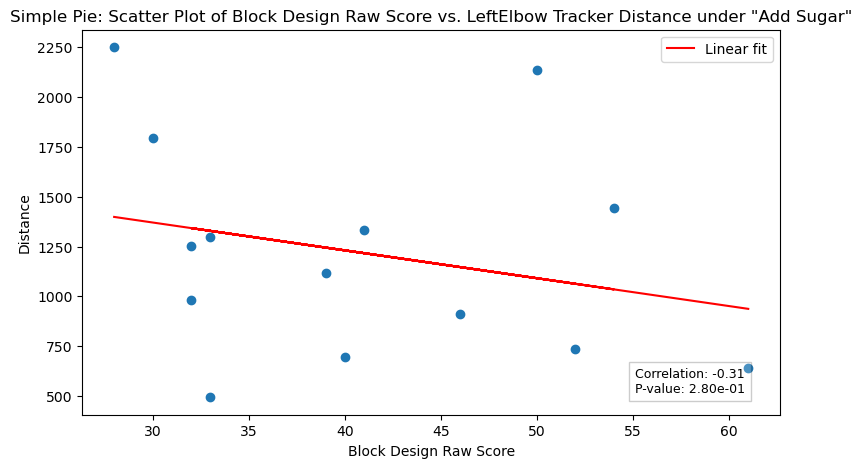

In [12]:
leftelbow_df = filtered_sugar
correlation, p_value = spearmanr(leftelbow_df['Block Design Raw Score'], leftelbow_df['LeftElbow Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(leftelbow_df['Block Design Raw Score'], leftelbow_df['LeftElbow Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(leftelbow_df['Block Design Raw Score'], leftelbow_df['LeftElbow Distance - Add Sugar'], 1)
fit_line = slope * leftelbow_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(leftelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '11 SP_SugarDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

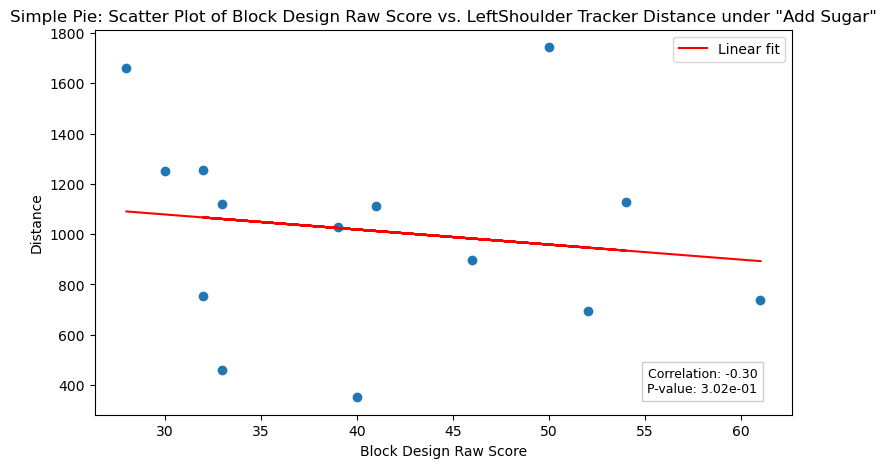

In [13]:
leftshoulder_df = filtered_sugar
correlation, p_value = spearmanr(leftshoulder_df['Block Design Raw Score'], leftshoulder_df['LeftShoulder Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(leftshoulder_df['Block Design Raw Score'], leftshoulder_df['LeftShoulder Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(leftshoulder_df['Block Design Raw Score'], leftshoulder_df['LeftShoulder Distance - Add Sugar'], 1)
fit_line = slope * leftshoulder_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(leftshoulder_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')

file_path = os.path.join(folder_path, '12 SP_SugarDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

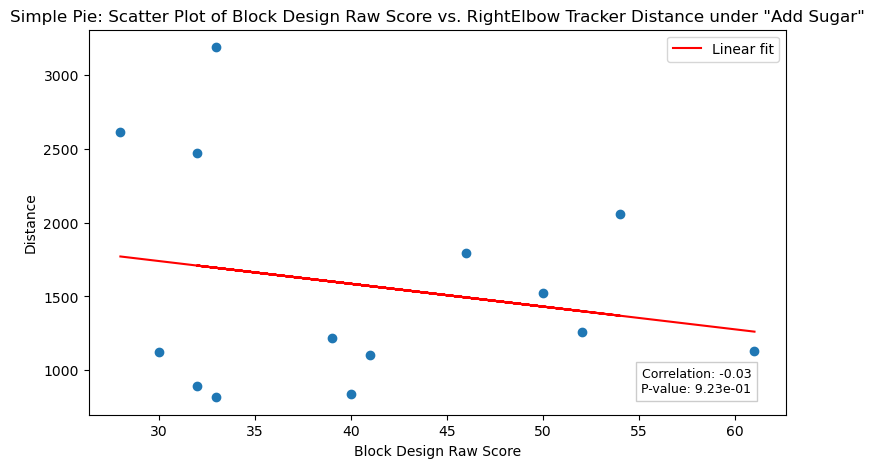

In [14]:
rightelbow_df = filtered_sugar
correlation, p_value = spearmanr(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Sugar'], 1)
fit_line = slope * rightelbow_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(rightelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')

file_path = os.path.join(folder_path, '13 SP_SugarDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

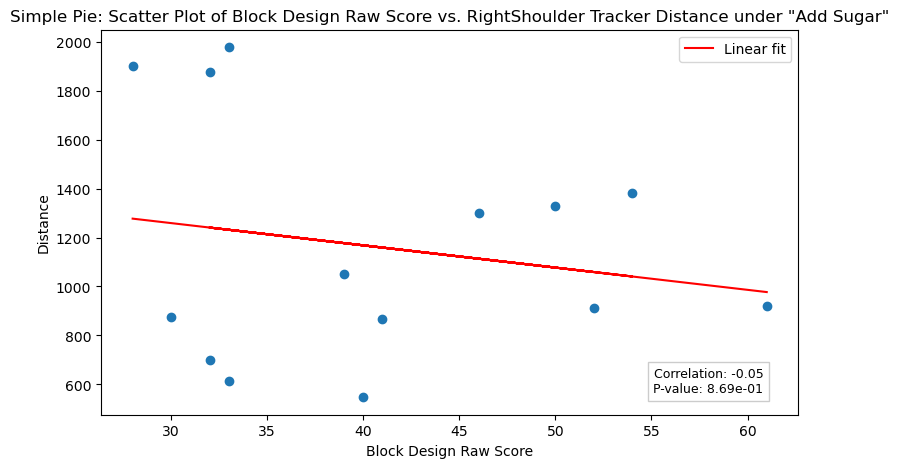

In [15]:
rightshoulder_df = filtered_sugar
correlation, p_value = spearmanr(rightshoulder_df['Block Design Raw Score'], rightshoulder_df['RightShoulder Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(rightshoulder_df['Block Design Raw Score'], rightshoulder_df['RightShoulder Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(rightshoulder_df['Block Design Raw Score'], rightshoulder_df['RightShoulder Distance - Add Sugar'], 1)
fit_line = slope * rightshoulder_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(rightshoulder_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')

file_path = os.path.join(folder_path, '14 SP_SugarDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

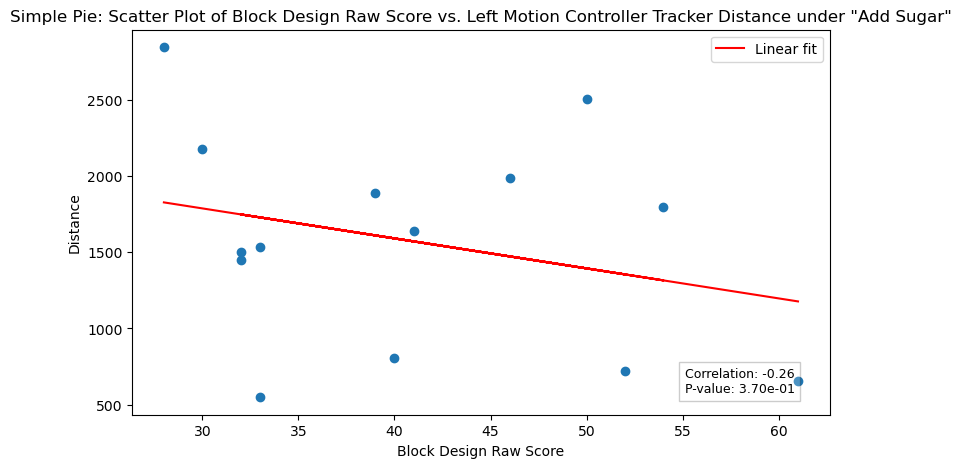

In [16]:
correlation, p_value = spearmanr(filtered_sugar['Block Design Raw Score'], filtered_sugar['MotionControllerLeft Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_sugar['Block Design Raw Score'], filtered_sugar['MotionControllerLeft Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_sugar['Block Design Raw Score'], filtered_sugar['MotionControllerLeft Distance - Add Sugar'], 1)
fit_line = slope * filtered_sugar['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_sugar['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left Motion Controller Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')

file_path = os.path.join(folder_path, '15 SP_SugarDistanceLeftController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

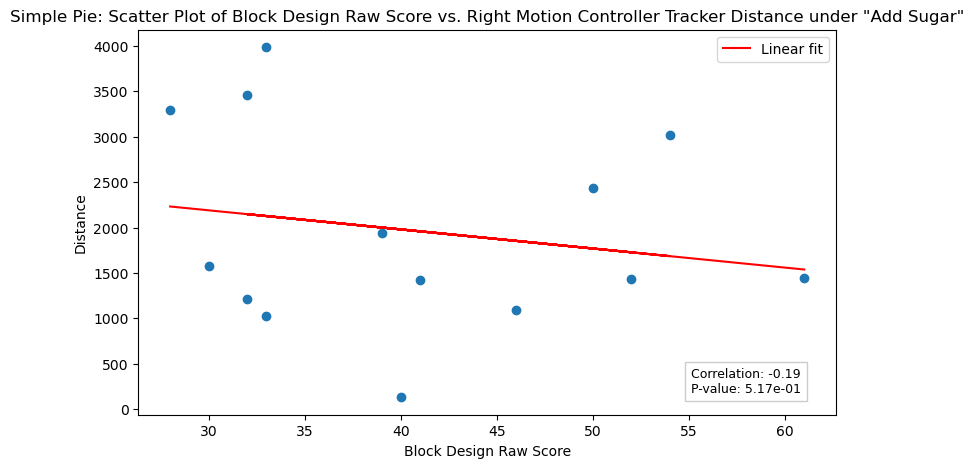

In [17]:
correlation, p_value = spearmanr(filtered_sugar['Block Design Raw Score'], filtered_sugar['MotionControllerRight Distance - Add Sugar'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_sugar['Block Design Raw Score'], filtered_sugar['MotionControllerRight Distance - Add Sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_sugar['Block Design Raw Score'], filtered_sugar['MotionControllerRight Distance - Add Sugar'], 1)
fit_line = slope * filtered_sugar['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_sugar['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right Motion Controller Tracker Distance under "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')

file_path = os.path.join(folder_path, '16 SP_SugarDistanceRightController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()